In [241]:
import cv2
import matplotlib.pyplot as plt 
from scipy import ndimage as nd
import numpy as np
from skimage.segmentation import watershed
from skimage.filters import rank
from skimage.morphology import disk

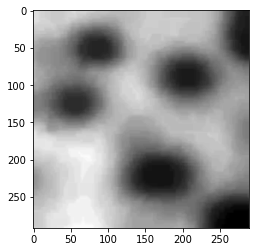

In [242]:
image = cv2.imread('A.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernel, iterations = 4)
plt.imshow(closing, cmap='gray')

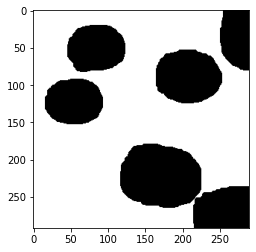

In [243]:

_, thresholdMarkers = cv2.threshold(closing, 120, 255, cv2.THRESH_BINARY)
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = ( 14, 14))
thresholdMarkers = cv2.erode(thresholdMarkers, kernel1)
plt.imshow(thresholdMarkers, cmap='gray')

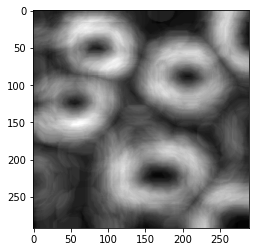

In [244]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30))
gradient = cv2.morphologyEx(closing, cv2.MORPH_GRADIENT, kernel)
_, threshold = cv2.threshold(gradient, 29, 255, cv2.THRESH_BINARY)
plt.imshow(gradient, cmap='gray')

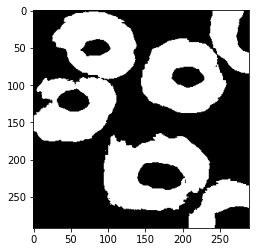

In [245]:

plt.imshow(threshold, cmap='gray')

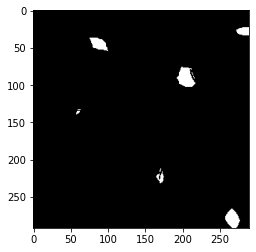

In [246]:
ellipse1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (71, 71))
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = ( 3, 3))
ellipse2 = cv2.erode(ellipse1, kernel)
holeRing = cv2.subtract(ellipse1,ellipse2)
marker = cv2.erode(threshold, holeRing,)
plt.imshow(marker, cmap='gray')

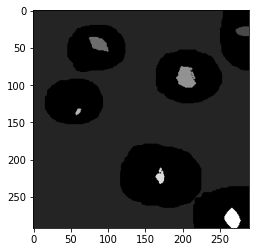

In [247]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = ( 3, 3))
marker = cv2.dilate(marker, kernel)
marker= np.uint8 (marker) 
#mark= marker[:,:,0]
ret, markers = cv2.connectedComponents(marker)
markers +=1
markers[markers==1]=0
markers[thresholdMarkers==255]=1


plt.imshow(markers, cmap='gray')

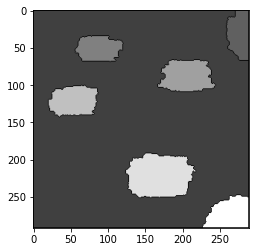

In [248]:
image = cv2.imread('A.png', cv2.COLOR_BGR2GRAY)
labels = cv2.watershed(image,markers)
plt.imshow(labels, cmap='gray')

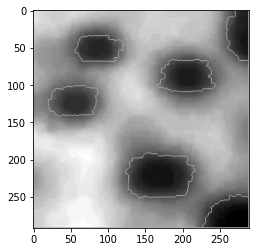

In [249]:
closing[labels==-1] = 150
plt.imshow(closing,cmap='gray')

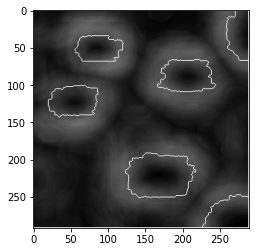

In [250]:
gradient[labels==-1] = 150
plt.imshow(gradient,cmap='gray')

In [251]:
image = cv2.imread('A.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernel, iterations = 4)

In [252]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30))
gradient = cv2.morphologyEx(closing, cv2.MORPH_GRADIENT, kernel)
_, threshold = cv2.threshold(gradient, 29, 255, cv2.THRESH_BINARY)

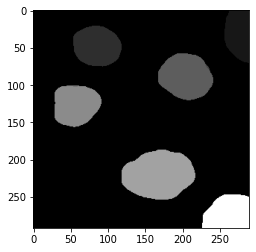

In [253]:
labels = watershed(threshold)
labels = np.uint8(labels)
labels = cv2.erode(labels,kernel)
labels = cv2.dilate(labels,kernel)
plt.imshow(labels, cmap='gray')

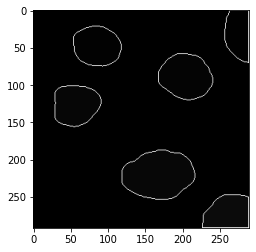

In [254]:
img = labels
_, labels = cv2.threshold(labels, 1, 255, cv2.THRESH_BINARY )
contours, hierarchy = cv2.findContours( labels, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (255,0,0), 1)
plt.imshow(img,cmap='gray')

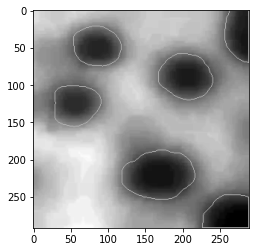

In [255]:
_, img = cv2.threshold(img, 14, 255, cv2.THRESH_BINARY )
closing[img==255] = 155
plt.imshow(closing,cmap='gray')

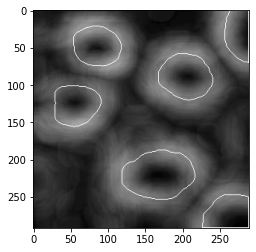

In [256]:
gradient[img==255] = 100
plt.imshow(gradient,cmap='gray')